# Importing libraries :

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

In [141]:
data=pd.read_csv("E://Csv files of data/titanic_data.csv")

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [144]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

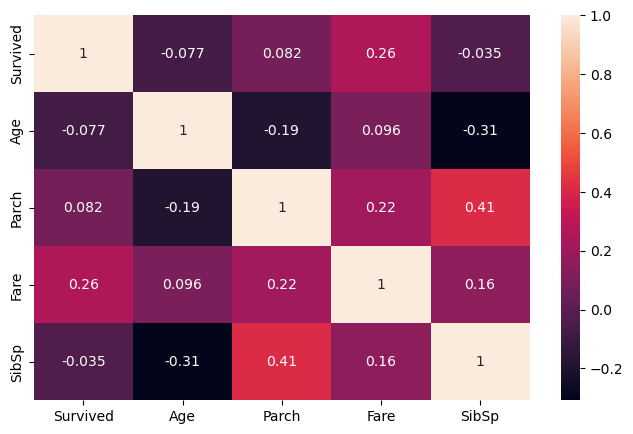

In [146]:
plt.figure(figsize=(8,5))
sns.heatmap(data[["Survived","Age","Parch","Fare","SibSp"]].corr(),annot=True)

it is showing age is not signficant or doesnt have effect on survival, but in the movie we have seen the word women and childern are first. so there is correlation of chunk or subpopulation of the age. so heatmap is doest not tell deeply about the features .

In [147]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='SibSp', ylabel='count'>

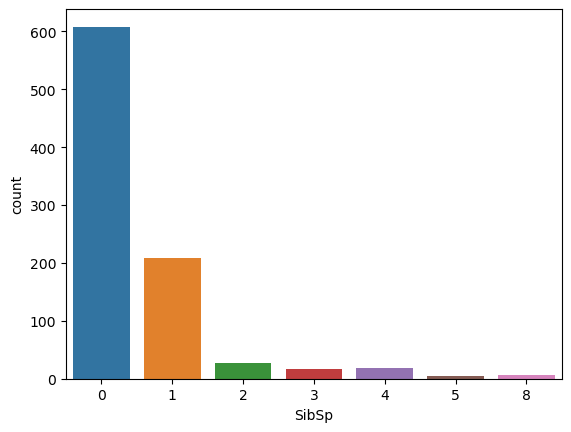

In [148]:
sns.countplot(x=data["SibSp"])

In [149]:
df1=data[data["SibSp"]==1]

In [150]:
df1=df1[df1["Survived"]==1]


In [151]:
df1["Survived"].unique()

array([1], dtype=int64)

In [152]:
len(df1)

112

In [153]:
df2=data[data["Survived"]==1]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [154]:
l=[]
for name in data["SibSp"].unique():
    c=0
    for i in df2["SibSp"]:
        if i==name:
            c=c+1
        
    print(name,c)
    l.append(c)
print(l)
        
       

        

1 112
0 210
3 4
4 3
2 13
5 0
8 0
[112, 210, 4, 3, 13, 0, 0]


In [155]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

.

Text(0.5, 1.0, 'Survived')

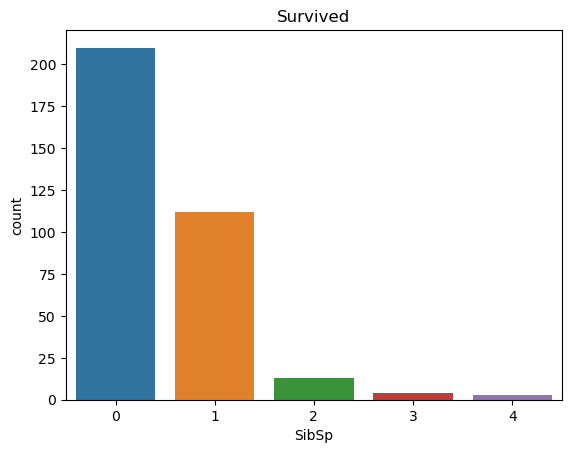

In [156]:
sns.countplot(x=df2["SibSp"]) 
plt.title("Survived")

# Age visualization :

<Axes: xlabel='Age', ylabel='Density'>

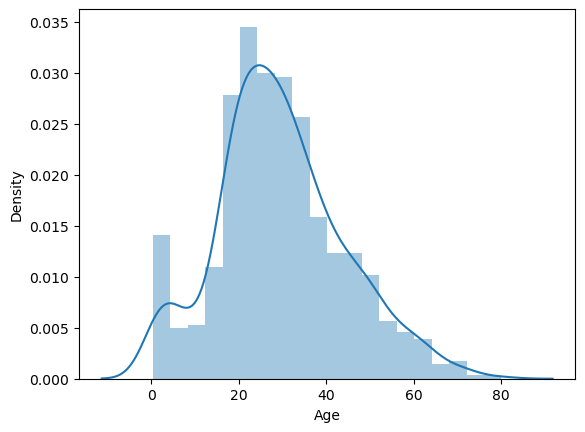

In [157]:
sns.distplot(data["Age"])

In [159]:
df3=data[data["Survived"]==0]

<Axes: xlabel='Age', ylabel='Density'>

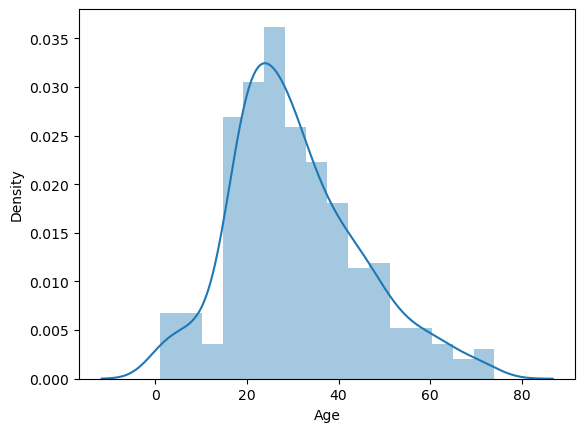

In [173]:
sns.distplot(df3["Age"])

# Sex

<Axes: xlabel='Sex', ylabel='Survived'>

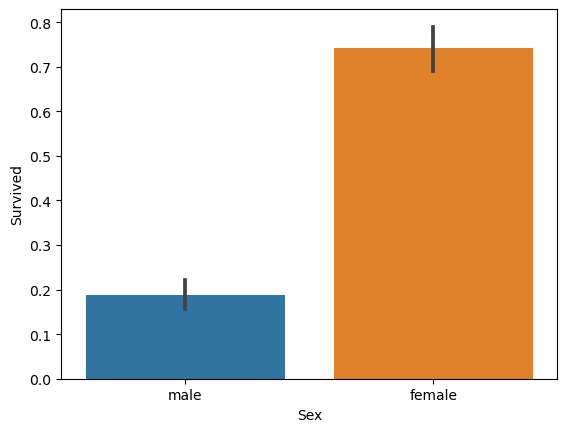

In [164]:
sns.barplot(x=data["Sex"],y=data["Survived"])

<Axes: xlabel='Pclass', ylabel='Survived'>

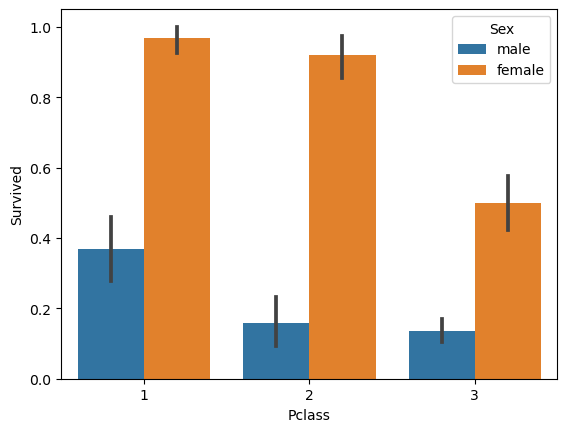

In [176]:
sns.barplot(x="Pclass",y="Survived",data=data,hue="Sex")

# Embankment:

<Axes: xlabel='Embarked', ylabel='Survived'>

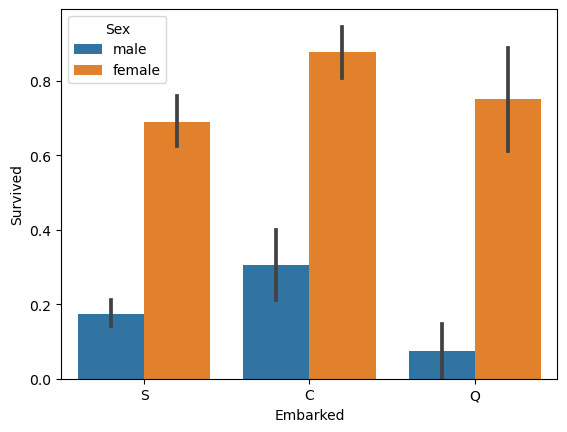

In [177]:
sns.barplot(x="Embarked",y="Survived",data=data,hue="Sex")

In [178]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Embarked', ylabel='count'>

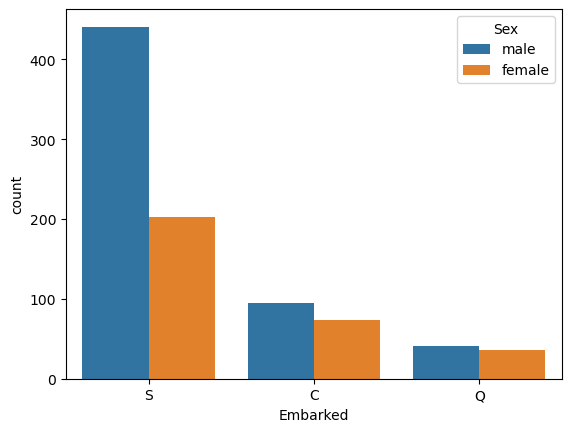

In [182]:
sns.countplot(x='Embarked',data=data,hue="Sex")

In [183]:
dfa=data[data["Embarked"]=="C"]
dfb=data[data["Embarked"]=="S"]
dfc=data[data["Embarked"]=="Q"]

Text(0.5, 1.0, 'Cherbourg')

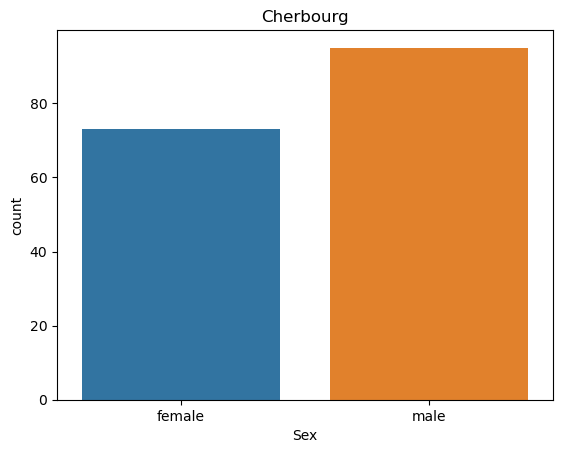

In [189]:
sns.countplot(x='Sex',data=dfa)
plt.title("Cherbourg")

Text(0.5, 1.0, 'Southampton')

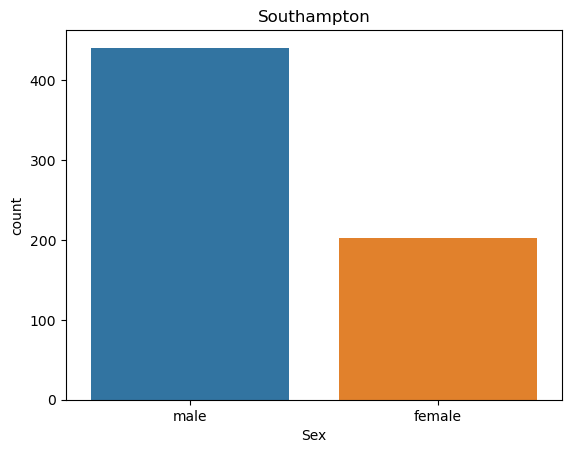

In [193]:
sns.countplot(x='Sex',data=dfb)
plt.title("Southampton")

Text(0.5, 1.0, 'Quenston')

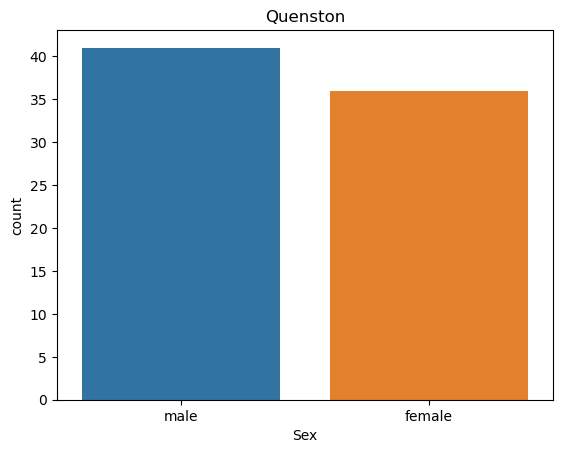

In [192]:
sns.countplot(x='Sex',data=dfc)
plt.title("Quenston")

Text(0.5, 1.0, 'Cherbourg')

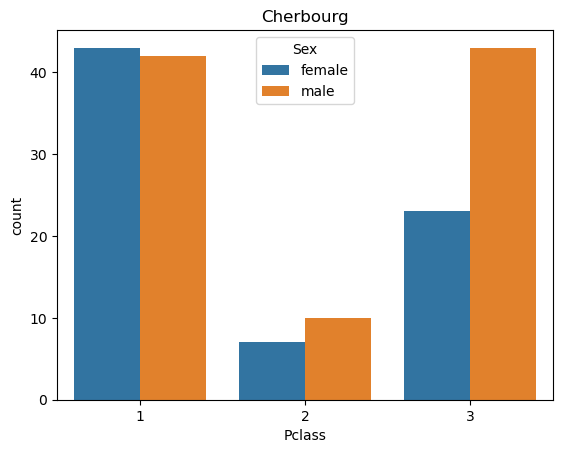

In [202]:
sns.countplot(x='Pclass',data=dfa,hue='Sex')
plt.title("Cherbourg")

Text(0.5, 1.0, 'Southampton')

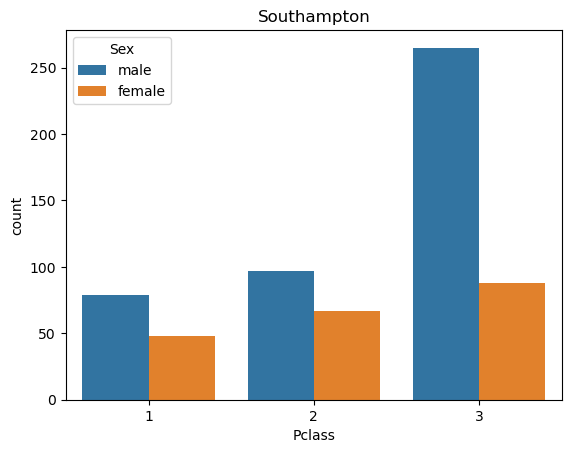

In [203]:
sns.countplot(x='Pclass',data=dfb,hue='Sex')
plt.title("Southampton")

Text(0.5, 1.0, 'Quenston')

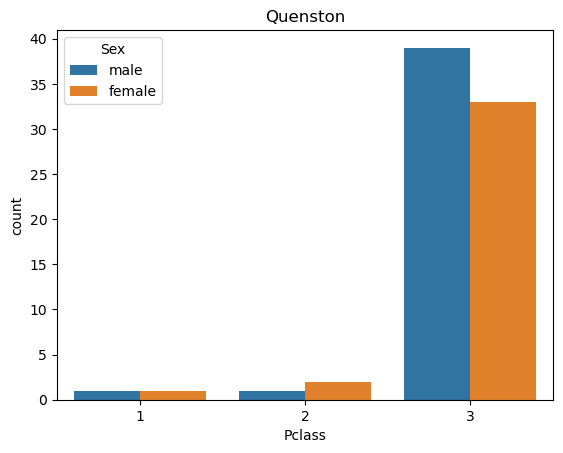

In [201]:
sns.countplot(x='Pclass',data=dfc,hue='Sex')
plt.title("Quenston")

In [239]:
is_null=data['Age'].isnull().sum()

In [240]:
is_null

0

In [242]:
a=data['Age'].copy()
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [228]:
mean=data['Age'].mean()
std=data["Age"].std()
is_null=data['Age'].isnull()
rand_age=np.random.randint(mean-std,mean+std,size=177)
rand_age

array([20, 16, 27, 20, 19, 26, 42, 35, 37, 27, 21, 38, 29, 37, 22, 15, 38,
       42, 36, 26, 24, 31, 23, 30, 37, 26, 33, 30, 25, 24, 16, 28, 30, 22,
       40, 25, 35, 32, 39, 27, 19, 33, 25, 23, 41, 19, 41, 15, 16, 43, 34,
       16, 38, 40, 33, 26, 37, 31, 29, 27, 38, 16, 36, 25, 31, 38, 40, 18,
       25, 26, 39, 38, 39, 22, 15, 26, 26, 34, 23, 16, 22, 23, 34, 40, 33,
       17, 37, 25, 23, 37, 15, 23, 42, 27, 21, 35, 30, 18, 41, 38, 21, 21,
       20, 21, 19, 20, 22, 19, 40, 40, 15, 28, 41, 34, 42, 36, 31, 36, 28,
       18, 19, 43, 22, 21, 41, 26, 39, 18, 29, 24, 24, 22, 43, 35, 27, 30,
       40, 17, 16, 25, 36, 27, 16, 15, 30, 34, 23, 41, 26, 31, 32, 20, 19,
       38, 33, 16, 19, 40, 39, 21, 16, 40, 25, 25, 27, 29, 34, 15, 43, 15,
       18, 37, 17, 21, 21, 37, 25])

In [233]:
a[np.isnan(a)]=rand_age

In [234]:
data['Age']=a

In [235]:
data['Age'].isnull().sum()

0

In [238]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [243]:
data["Embarked"]=data["Embarked"].fillna('S')

In [244]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [245]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
col_to_drop=["PassengerId","Name","Cabin","Ticket"]
data.drop(col_to_drop,axis=1,inplace=True)

In [248]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [255]:
gender={'male':0,'female':1}
data['Sex']=data['Sex'].map(gender)

In [256]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,25.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [258]:
ports={'S':0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(ports)

In [259]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting the data :


In [283]:
x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]

In [288]:
from sklearn.model_selection import train_test_split

In [290]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=43)

In [291]:
xtrain.shape

(623, 7)

In [293]:
xtest.shape

(268, 7)

# Scaling :

In [294]:
from sklearn.preprocessing import StandardScaler

In [295]:
sc_x=StandardScaler()

In [296]:
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

# Classification :


In [314]:
log_reg=LogisticRegression()
svc=SVC()
Dst=DecisionTreeClassifier()
knn=KNeighborsClassifier(5)
rf=RandomForestClassifier(1000)

In [315]:
log_reg.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)
Dst.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [316]:
log_reg=log_reg.predict(xtest)


In [318]:
log_reg


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [319]:
svc=svc.predict(xtest)
Dst=Dst.predict(xtest)
knn=knn.predict(xtest)
rf=rf.predict(xtest)

In [320]:
svc

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [321]:
Dst

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [323]:
knn

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [325]:
rf

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [326]:
from sklearn.metrics import accuracy_score

In [339]:
logstic_acc=accuracy_score(ytest,log_reg)
svc_acc=accuracy_score(ytest,svc)
dst_acc=accuracy_score(ytest,Dst)
knn_acc=accuracy_score(ytest,knn)
rf_acc=accuracy_score(ytest,rf)


In [347]:
print("logistic regression Classifier     :",round(logstic_acc*100,2))
print("Support Vector Machinee Classifier :",round(svc_acc*100,2))
print("Descion tree Classifier            :",round(dst_acc*100,2))
print("KNeighbour Classifier              :",round(knn_acc*100,2))
print("Random Forest Classifier           :",round(rf_acc*100,2))

logistic regression Classifier     : 75.75
Support Vector Machinee Classifier : 79.85
Descion tree Classifier            : 70.52
KNeighbour Classifier              : 77.24
Random Forest Classifier           : 78.36
